In [1]:
import pandas as pd
df = pd.read_csv("IMDB Dataset.csv")
print(df.shape)
df.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def clean_text(text):
  text = re.sub(r'<.*?>', '', text)
  text = text.lower()
  text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
  text = re.sub(r'\d+', '', text)
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text


df['clean_review'] = df['review'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_review'])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['sentiment'])


In [6]:
print("TF-IDF shape:", X.shape)


TF-IDF shape: (50000, 5000)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8869

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
 [[4324  637]
 [ 494 4545]]


In [10]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))


Naive Bayes Accuracy: 0.8505


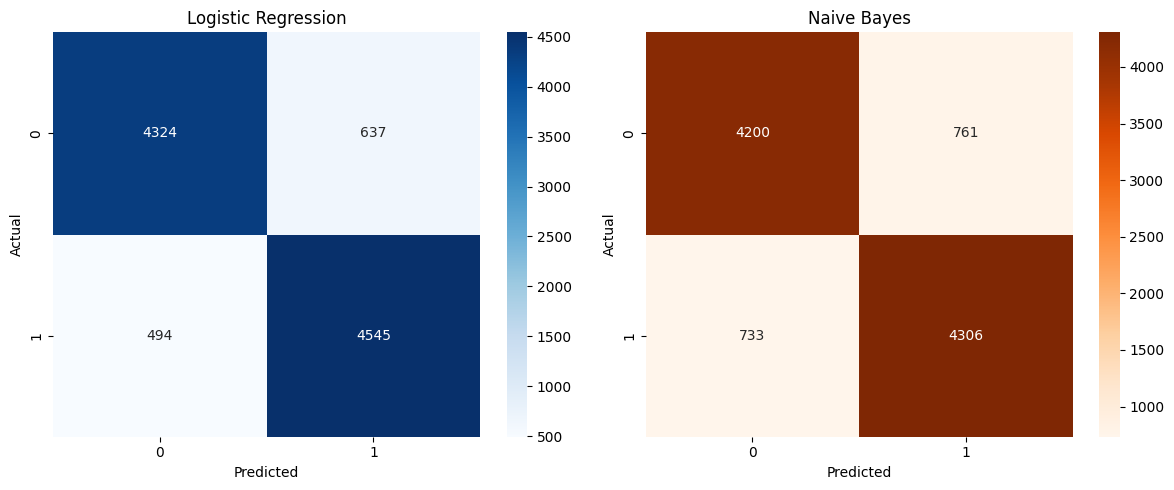

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

log_cm = np.array([
    [4324, 637],
    [494,  4545]
])


nb_cm = np.array([
    [4200, 761],
    [733,  4306]
])


fig, axs = plt.subplots(1, 2, figsize=(12, 5))


sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title("Logistic Regression")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")


sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Oranges', ax=axs[1])
axs[1].set_title("Naive Bayes")
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("Actual")


plt.tight_layout()
plt.savefig("sentiment_model_comparison.png")
plt.show()
